# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [2]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)

# adding a column of 1 to accomodate bias 
x1 = np.ones((data.shape[0], 1))
x = np.concatenate([x1, x], axis = 1)

# defining matrices for cvxopt 
Q = matrix(np.identity(x.shape[1]))
p = matrix(np.zeros((x.shape[1], 1)))

h  = -1 / np.abs(y)
h = matrix(h)
G = matrix(-x*y)

#training 
out = solvers.qp(Q, p, G, h)
z = np.asarray(out['x'])
z

     pcost       dcost       gap    pres   dres
 0:  1.7890e+00  3.9171e+01  1e+02  2e+00  3e+01
 1:  1.4170e+01  1.4208e+01  4e+01  6e-01  8e+00
 2:  2.2524e+01  2.5627e+01  4e+01  5e-01  7e+00
 3:  4.8660e+01  5.0039e+01  1e+01  1e-01  2e+00
 4:  5.7717e+01  5.7639e+01  8e-01  6e-03  8e-02
 5:  5.8215e+01  5.8178e+01  9e-02  4e-04  6e-03
 6:  5.8237e+01  5.8237e+01  1e-03  4e-06  5e-05
 7:  5.8237e+01  5.8237e+01  1e-05  4e-08  5e-07
 8:  5.8237e+01  5.8237e+01  1e-07  4e-10  5e-09
Optimal solution found.


array([[-5.3742034 ],
       [ 6.6678144 ],
       [ 6.56755772]])

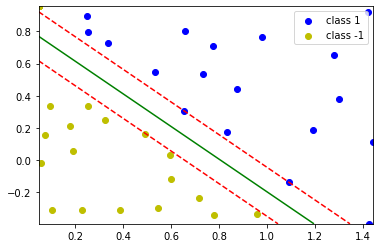

In [3]:
# getting a, b, c from the weight matrix.
b = z[2]
a = z[1]
c = z[0] 

X_1 = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 20)
X_2 = np.linspace(np.min(x[:,2]), np.max(x[:,2]), 20)
x_, y_ = np.meshgrid(X_1, X_2)

# finding z as a*x1 + b*x2 + c
z_ = a*x_ + b*y_ + c 

fig, ax = plt.subplots(1)
ax.contour(x_, y_, z_, levels=[0], colors='g')
ax.contour(x_, y_, z_, levels=[-1], colors='r',linestyles='dashed')
ax.contour(x_, y_, z_, levels=[1], colors='r',linestyles='dashed')
ax.scatter(x[np.where(y == 1),1], x[np.where(y == 1),2], color='b', label="class 1")
ax.scatter(x[np.where(y == -1),1], x[np.where(y == -1),2], color='y', label="class -1")
ax.legend()

## b) and c) : Linearly Non-separable Dataset

In [4]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2].reshape(-1, 1)

# appending 1 to make the bias
x_ones = np.ones((x.shape[0],1))
x = np.concatenate([x_ones, x], axis=1)

In [5]:
#constructing G
e = np.identity(x.shape[0])
x_y = y*x

In [6]:
G = np.concatenate([x_y, e], axis=1)
h = np.ones(x.shape[0])
Q = np.identity(x.shape[0]+3)
p = np.ones(x.shape[0]+3)
p[:3] = 0

In [7]:
G = matrix(-G)
Q = matrix(Q)
p_ = matrix(0.05*p)
h = matrix(-h)

In [8]:
def solve(G, Q, p, h):
    solvers.options['show_progress'] = False
    out = solvers.qp(Q, p, G, h) 
    z = np.asarray(out['x'])
    return z[:3]

In [9]:
z = solve(G, Q, p_, h)

Decision boundary when c = 0.05


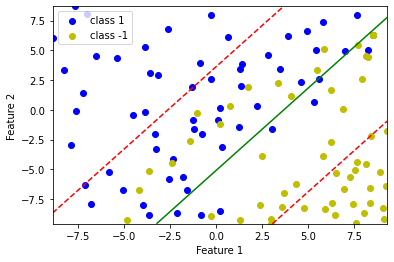

In [10]:
#plotting the decision boundary 
def plot(x, y, z):
    X_1 = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 20)
    b = z[2]
    a = z[1]
    c = z[0] 

    X_2 = np.linspace(np.min(x[:,2]), np.max(x[:,2]), 20)
    x_, y_ = np.meshgrid(X_1, X_2)

    z_ = a*x_ + b*y_ + c

    fig, ax = plt.subplots(1)
    ax.contour(x_, y_, z_, levels=[0], colors='g')
    ax.contour(x_, y_, z_, levels=[-1], colors='r',linestyles='dashed')
    ax.contour(x_, y_, z_, levels=[1], colors='r',linestyles='dashed')

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.scatter(x[np.where(y == 1),1], x[np.where(y == 1),2], color='b', label="class 1")
    ax.scatter(x[np.where(y == -1),1], x[np.where(y == -1),2], color='y', label="class -1")
    ax.legend()

print("Decision boundary when c = 0.05")
plot(x, y, z)

Decision boundary when c =  0.1


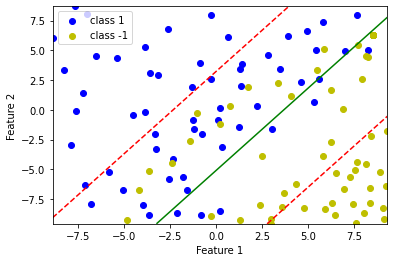

In [11]:
# for different c values
C = [0.1, 1, 100, 1000000]
print("Decision boundary when c = ", str(C[0]))
p_ = matrix(C[0]*p)
z = solve(G, Q, p_, h)
plot(x, y, z)

Decision boundary when c =  1


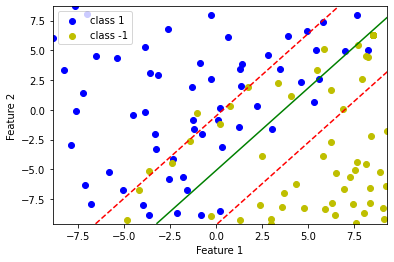

In [12]:
print("Decision boundary when c = ", str(C[1]))
p_ = matrix(C[1]*p)
z = solve(G, Q, p_, h)
plot(x, y, z)

Decision boundary when c =  100


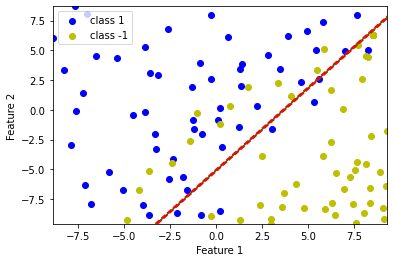

In [13]:
print("Decision boundary when c = ", str(C[2]))
p_ = matrix(C[2]*p)
z = solve(G, Q, p_, h)
plot(x, y, z)

Decision boundary when c =  1000000


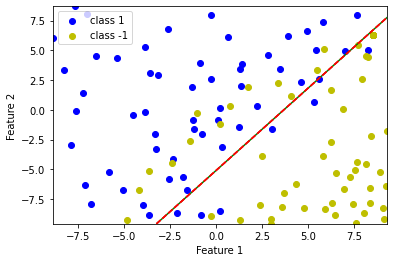

In [14]:
print("Decision boundary when c = ", str(C[3]))
p_ = matrix(C[3]*p)
z = solve(G, Q, p_, h)
plot(x, y, z)

### Explain your observations here:
As the value of C increases the margin width reduces. This is because a higher value of C heavily penalizes the misclassified points. So the term which tries to reduce the hinge loss, will dominate the term which maximizes the margin. Hence the margin becomes narrow and almost coincide for higher c values.